img.dtype = uint8


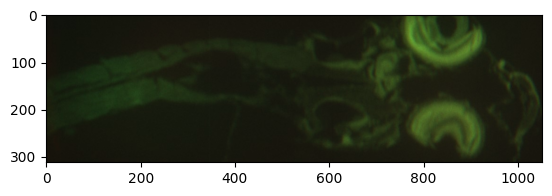

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# img = cv2.imread("./Bodybone.bmp")
img = cv2.imread("./fish.jpg")


print(f"img.dtype = {img.dtype}")


plt.imshow(img)


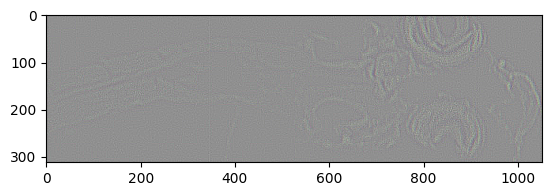

In [2]:
laplacian_kernel = np.array([[-1,-1,-1],
                            [-1, 8,-1],
                            [-1,-1,-1]])

                            
laplacian = cv2.filter2D(img, cv2.CV_16S, laplacian_kernel)
# laplacian = cv2.Laplacian(img,-1)
laplacian_save = (255*((laplacian-np.min(laplacian))/ (np.max(laplacian)-np.min(laplacian)))).astype(np.uint8)
plt.imshow(laplacian_save, cmap='gray')



In [3]:
laplacian.min()


-67

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


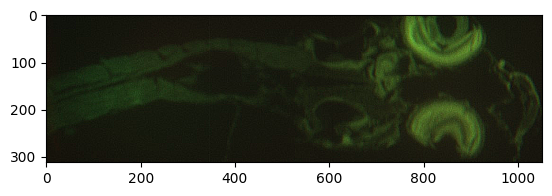

In [4]:
lap_sharpend = img + laplacian
# plt.imshow(cv2.cvtColor(lap_sharpend, cv2.COLOR_BGR2RGB))

plt.imshow(lap_sharpend, cmap='gray')




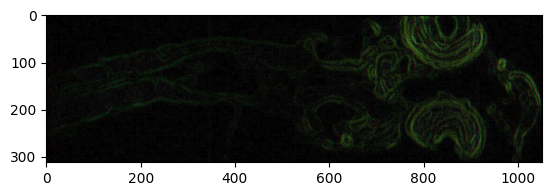

In [5]:
sobel_x = cv2.Sobel(img , cv2.CV_16S, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img , cv2.CV_16S, 0, 1, ksize=3)
# sobel = np.abs(sobel_x) + np.abs(sobel_y)
sobel = np.abs(sobel_x) + np.abs(sobel_y)

plt.imshow(sobel, cmap='gray')



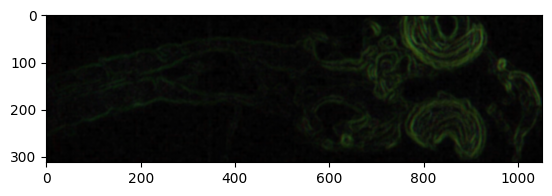

In [6]:
box_kernel = np.ones((5,5),np.float32)/25
sobel_blur = cv2.filter2D(sobel, cv2.CV_16S, box_kernel)
plt.imshow(sobel_blur,cmap='gray')


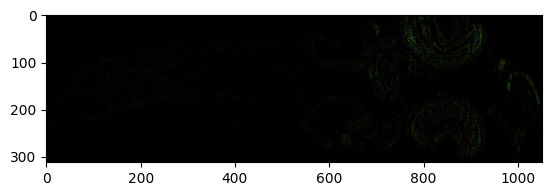

In [7]:
mask = (laplacian * sobel_blur)
mask[mask<0] = 0
mask = (255*((mask - np.min(mask)) / (np.max(mask) - np.min(mask)))).astype(np.uint8)
plt.imshow(mask, cmap='gray')


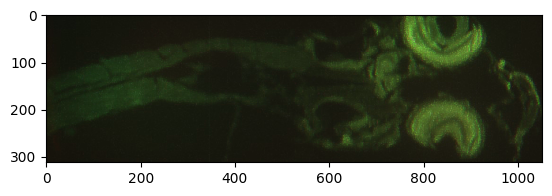

In [8]:
soblap_sharpened = img + mask
plt.imshow(soblap_sharpened, cmap = 'gray')



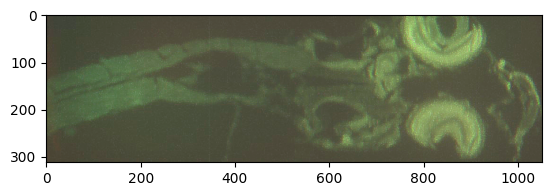

In [9]:
c = 1
gamma = 0.5
powerlaw = soblap_sharpened**gamma*c
powerlaw = (255*((powerlaw - np.min(powerlaw)) / (np.max(powerlaw) - np.min(powerlaw)))).astype(np.uint8)
plt.imshow(powerlaw, cmap='gray')

